In [41]:
import pandas as pd

In [42]:
import matplotlib.pyplot as plt


In [43]:
state_tracker = pd.read_csv('https://covidtracking.com/api/states.csv')

In [44]:
population = pd.read_csv('http://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-popchg2010_2019.csv?#')

In [45]:
states = pd.merge(state_tracker,population[['STATE','POPESTIMATE2019','NAME']],left_on='fips', right_on='STATE')

In [46]:
states.rename(columns={"POPESTIMATE2019":"population"}, inplace=True)

In [47]:
states.columns

Index(['state', 'positive', 'positiveScore', 'negativeScore',
       'negativeRegularScore', 'commercialScore', 'grade', 'score', 'negative',
       'pending', 'hospitalizedCurrently', 'hospitalizedCumulative',
       'inIcuCurrently', 'inIcuCumulative', 'onVentilatorCurrently',
       'onVentilatorCumulative', 'recovered', 'lastUpdateEt', 'checkTimeEt',
       'death', 'hospitalized', 'total', 'totalTestResults', 'posNeg', 'fips',
       'dateModified', 'dateChecked', 'notes', 'hash', 'STATE', 'population',
       'NAME'],
      dtype='object')

In [48]:
states['positive_percent_tested'] = states['positive']/states['totalTestResults'] * 100

In [49]:
states['positive_per_million_population'] = states['positive']/states['population'] * 1000000

### Top ten states with positive cases

In [50]:
top_states = states.sort_values(by='positive', ascending=False).head(10)

In [51]:
top_states.plot(kind='bar',x='state', y=['totalTestResults','positive'], color=['yellow','red'])

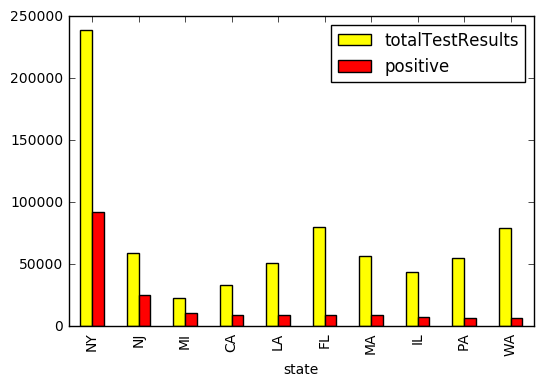

In [52]:
plt.show()

### Top 10 states with positive cases for every 100 tested

In [53]:
top_states_pos_perc = states.sort_values(by='positive_percent_tested', ascending=False).head(10)

In [54]:
top_states_pos_perc.plot(kind='bar',y='positive_percent_tested',x='state')

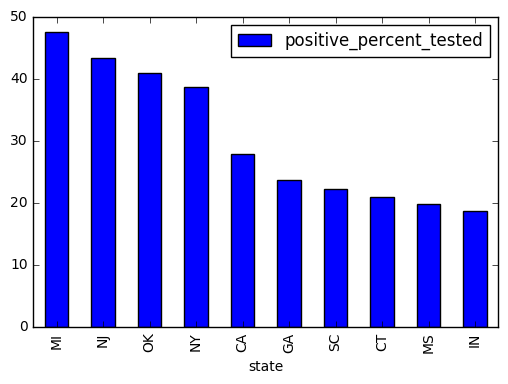

In [55]:
plt.show()

### Top 10 states with positive cases per every one million of population

In [56]:
top_states_pos_per_million = states.sort_values(by='positive_per_million_population', ascending=False).head(10)

In [57]:
top_states_pos_per_million.plot(kind='bar',x='state',y='positive_per_million_population')

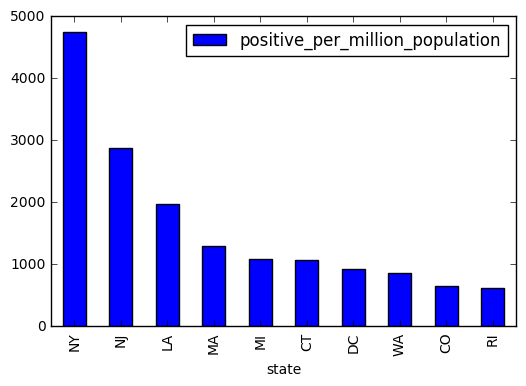

In [58]:
plt.show()